In [1]:
import pandas as pd


df = pd.read_csv(
    "./data/book_sales.csv",
    index_col = 'Date',
    parse_dates = ['Date'],
).drop('Paperback', axis = 1)


df.head(10)

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191
2000-04-06,168
2000-04-07,170
2000-04-08,145
2000-04-09,184


In [2]:
import numpy as np

df['Time'] = np.arange(len(df.index))

df.head(10)

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4
2000-04-06,168,5
2000-04-07,170,6
2000-04-08,145,7
2000-04-09,184,8


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout = True,
    figsize = (16, 9),
    dpi = 300,
    titlesize = 18,
    titleweight = 'bold',
)

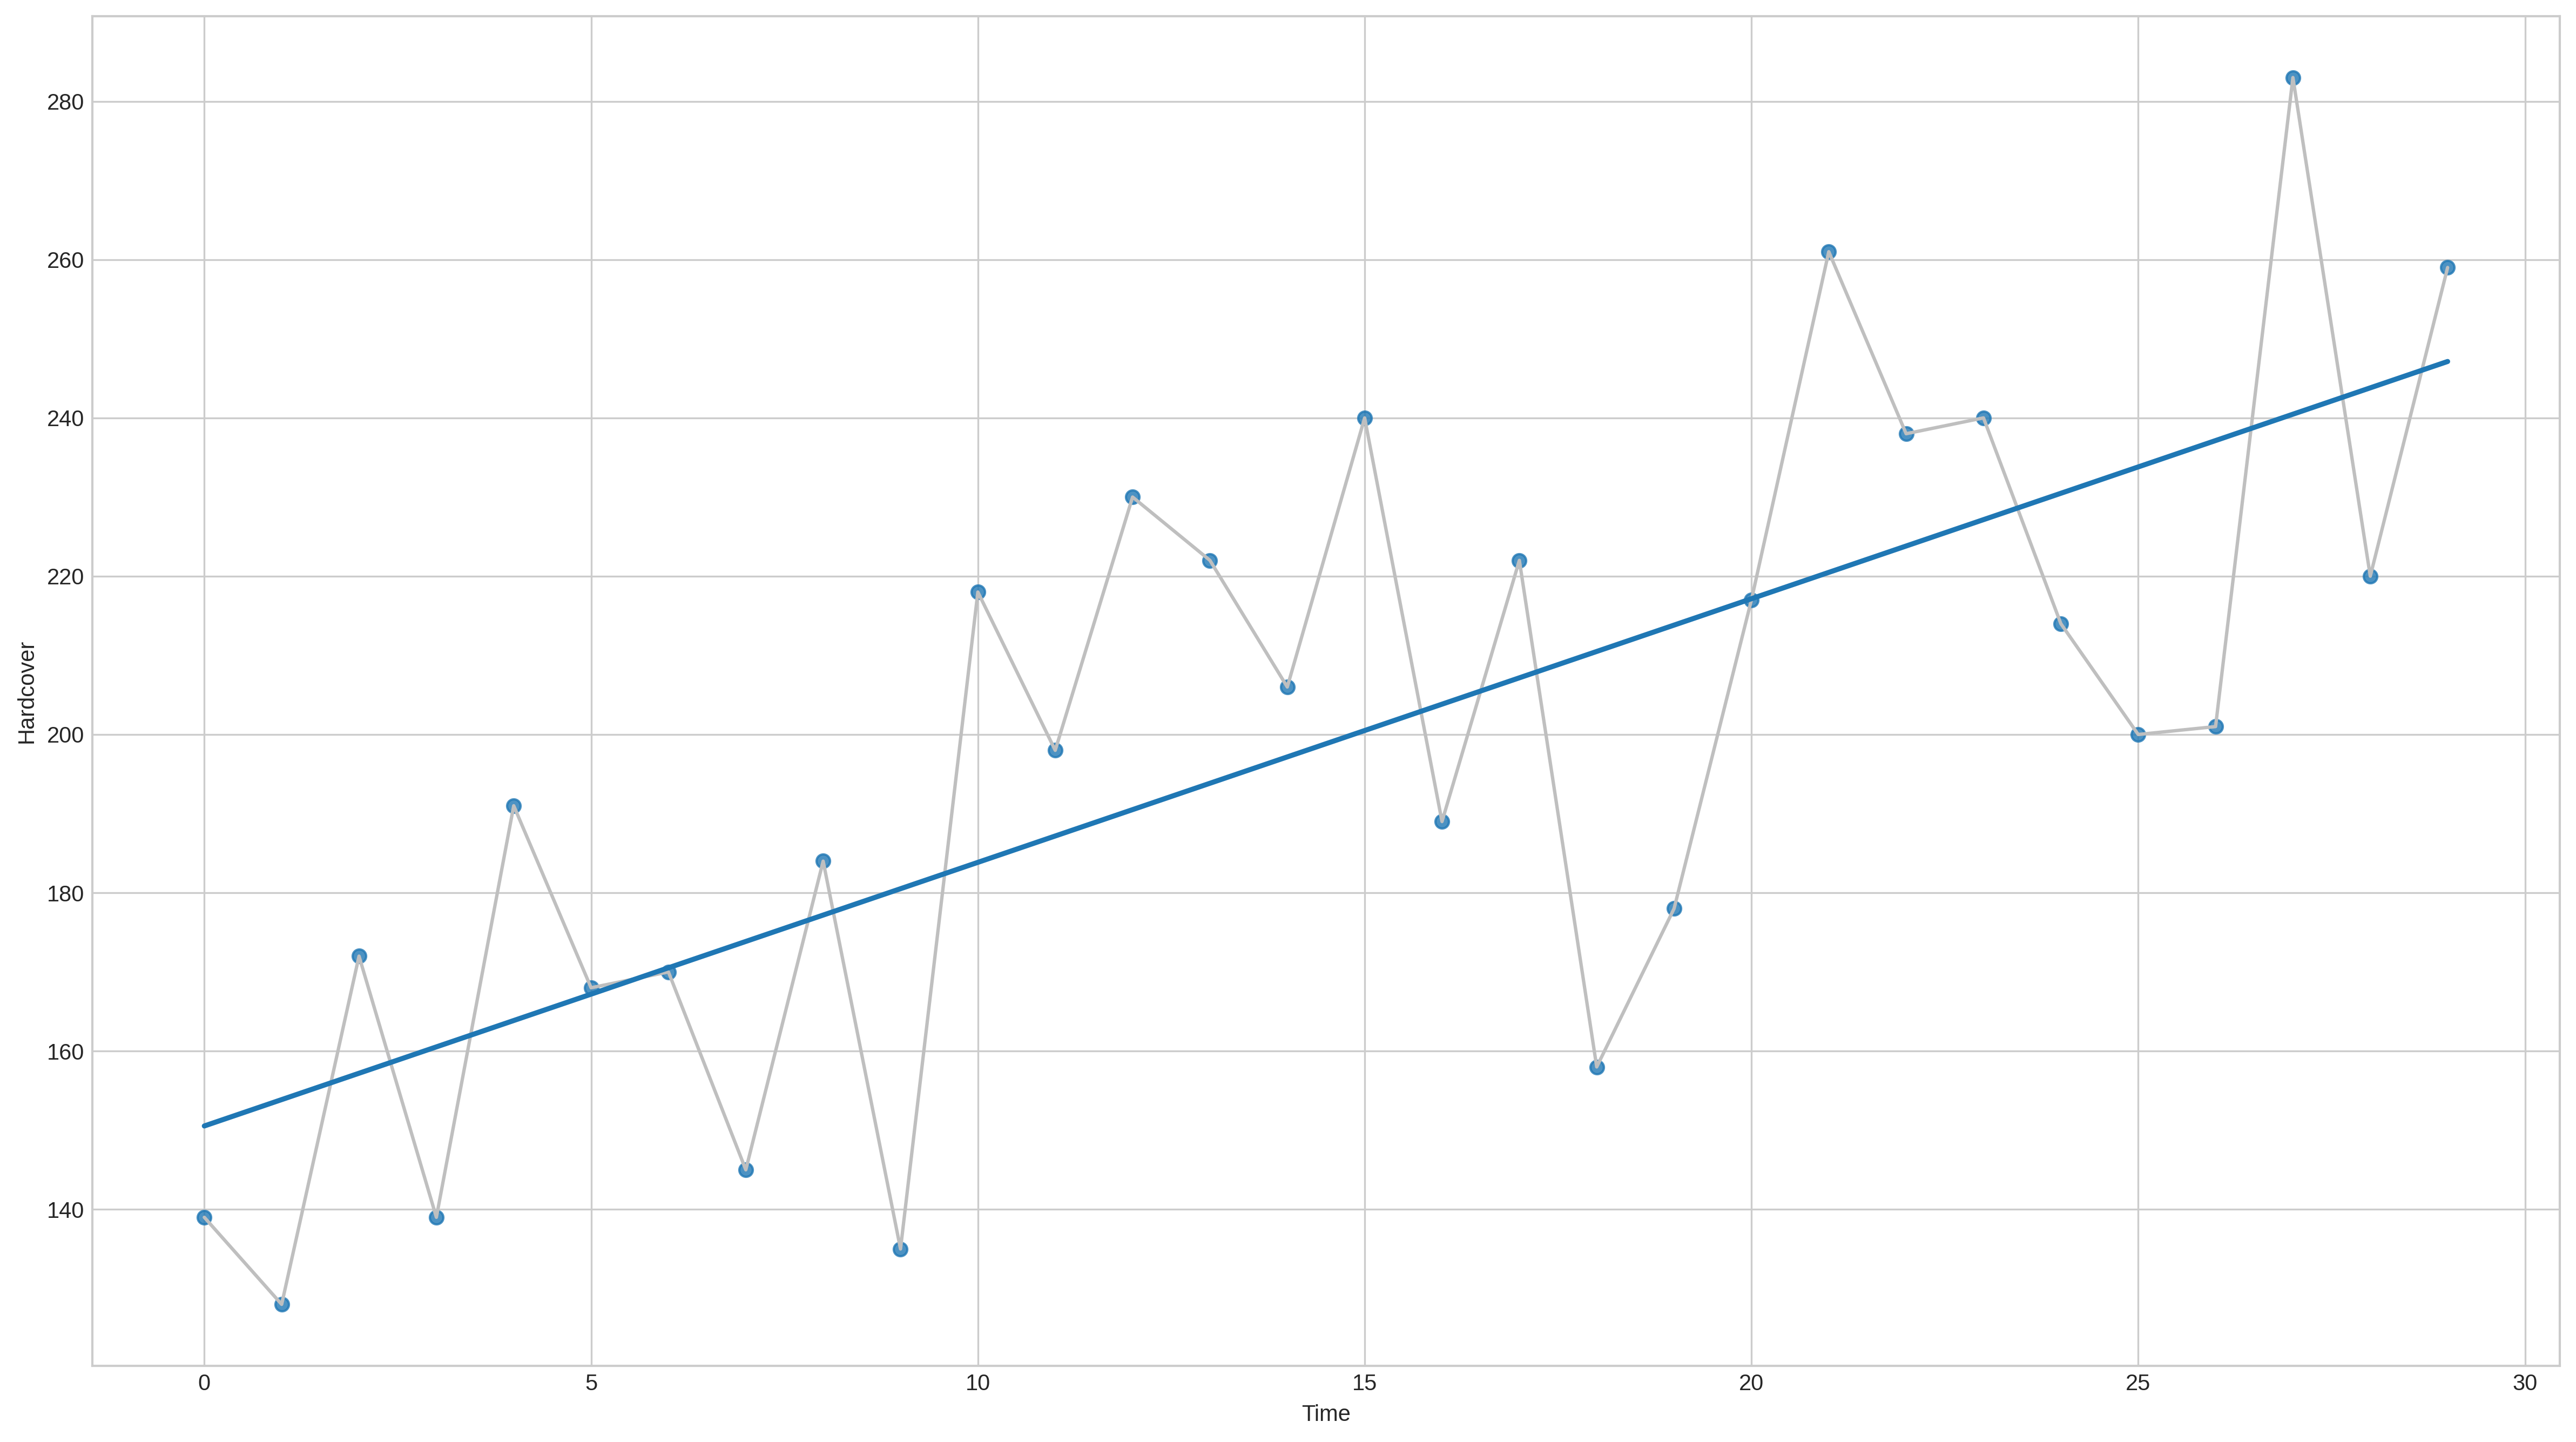

In [4]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data = df, color = '0.75')
ax = sns.regplot(x = 'Time', y = 'Hardcover', data = df, ci = None)

In [5]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns = ['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


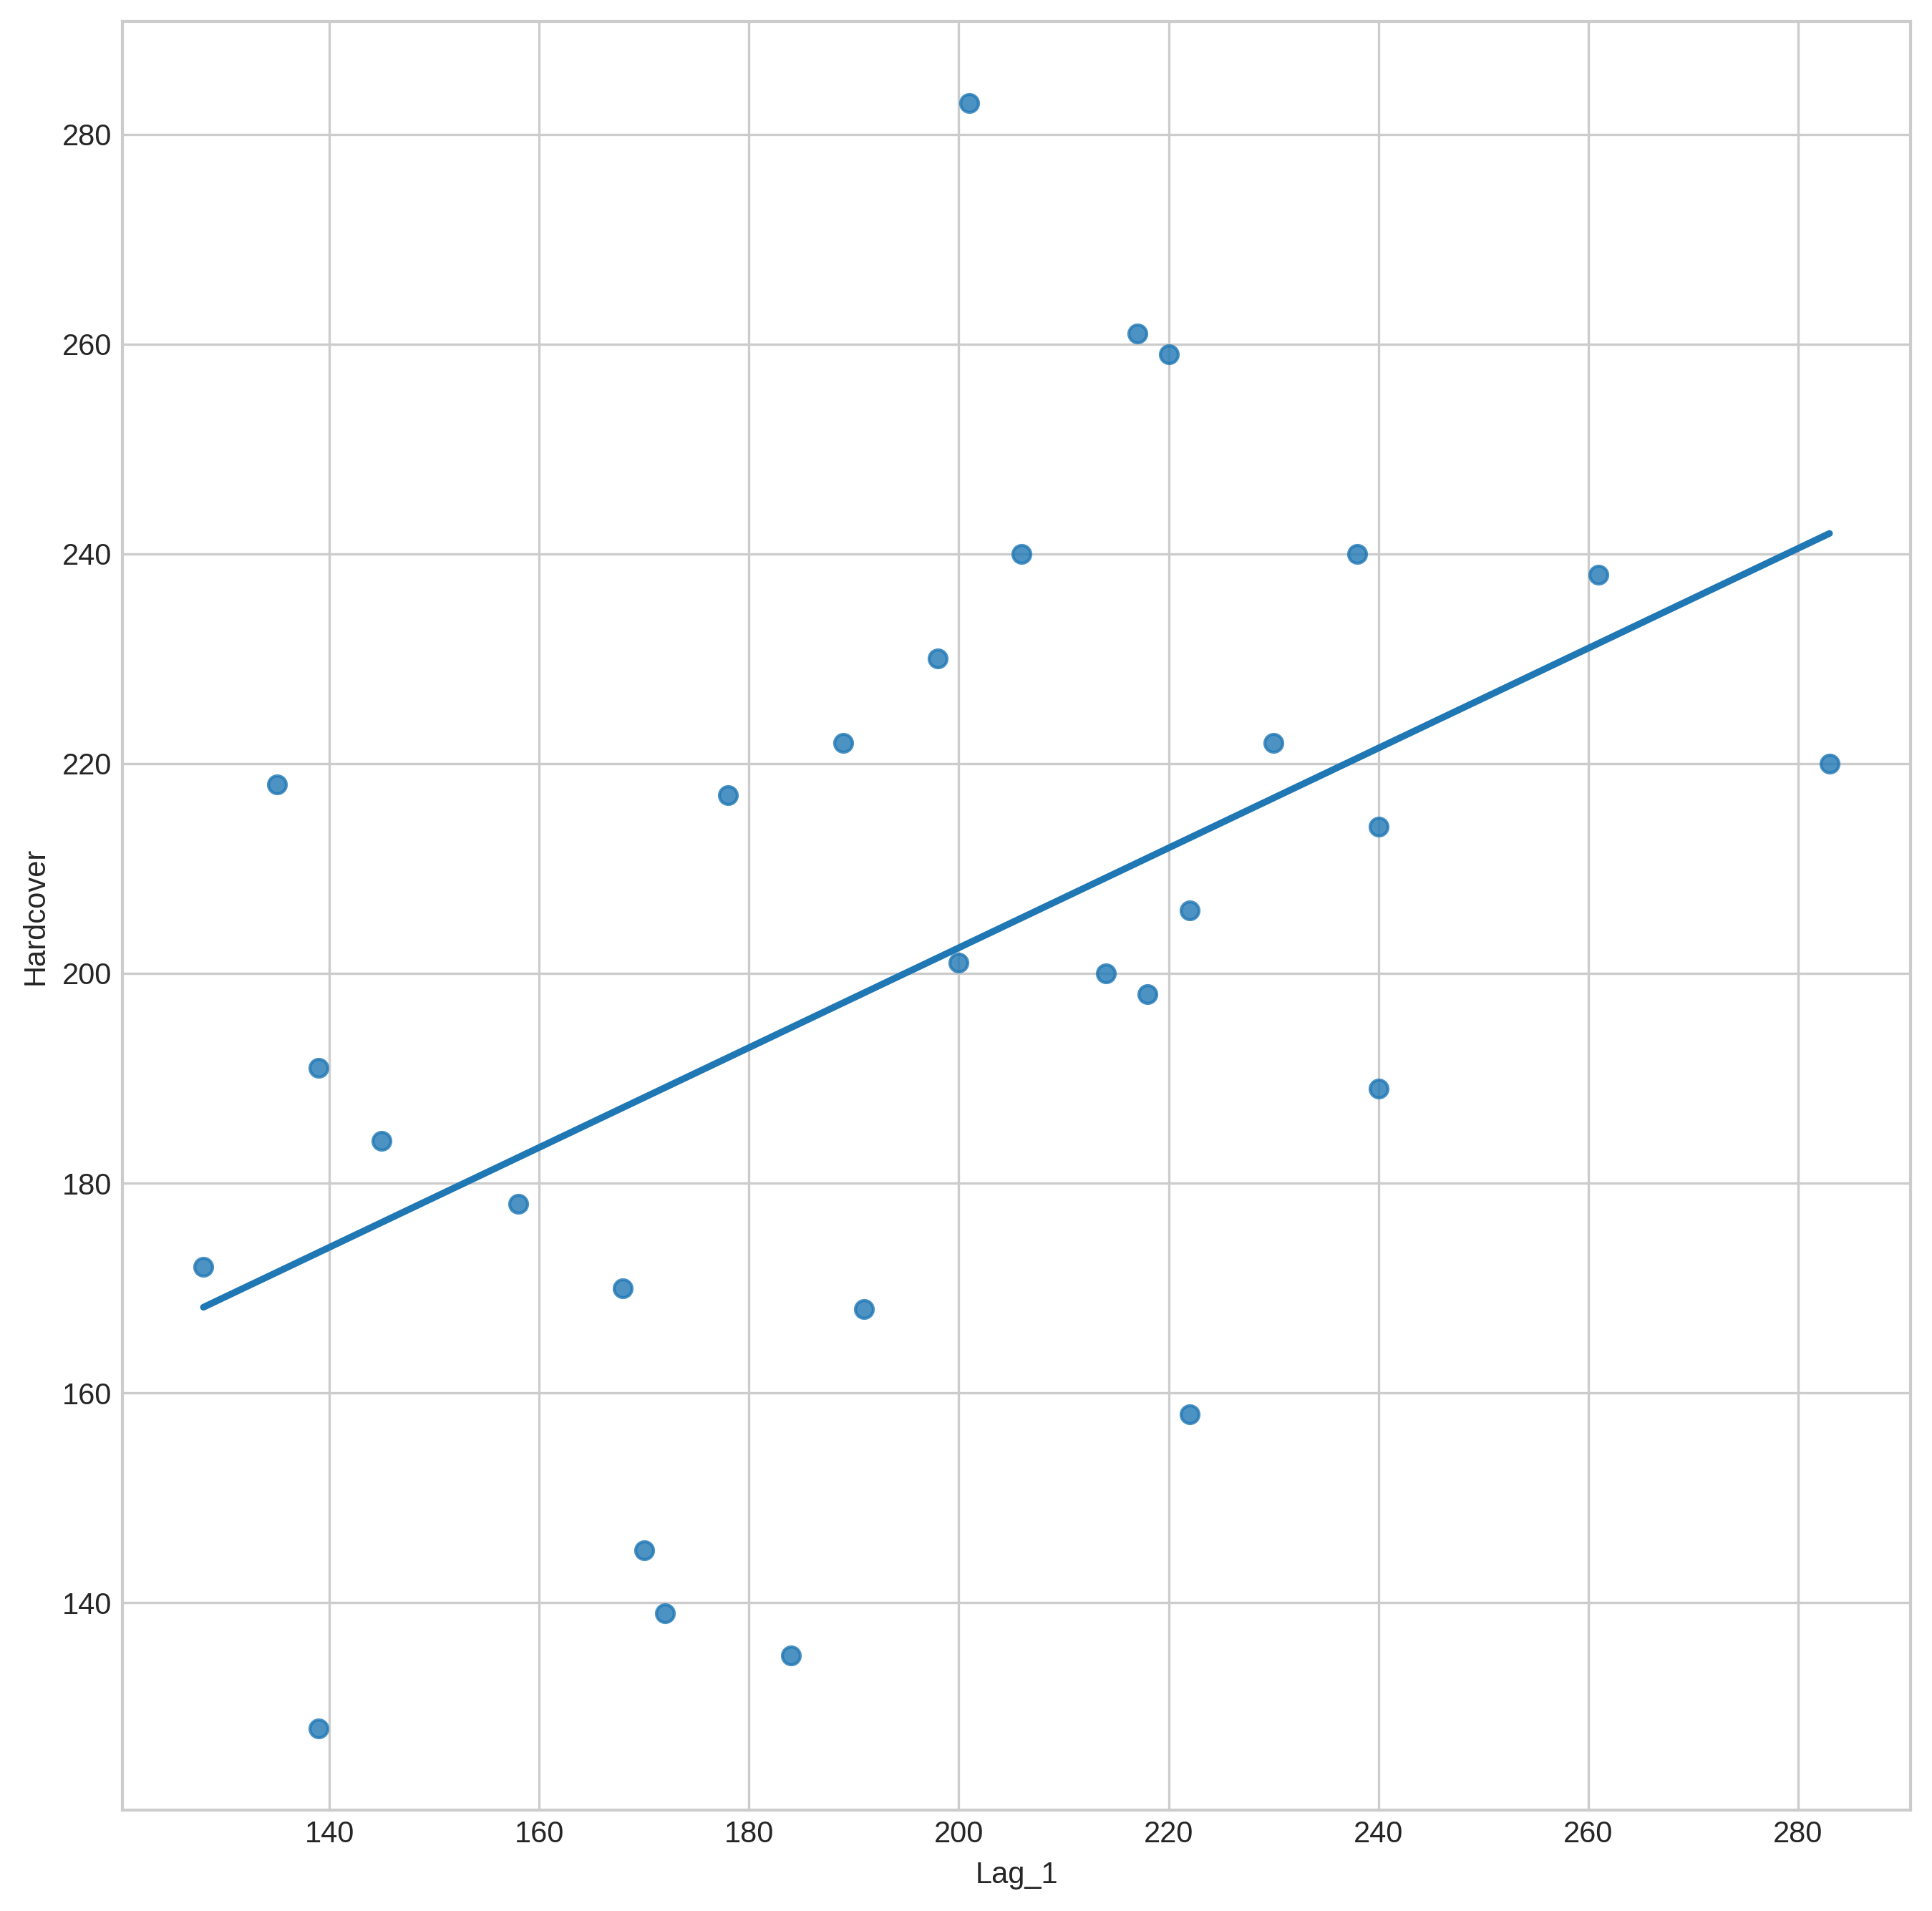

In [8]:
fig, ax = plt.subplots()
ax = sns.regplot(data = df,
                 x = 'Lag_1', y = 'Hardcover',
                 ci = None)
ax.set_aspect('equal')

In [10]:
from pathlib import Path
from warnings import simplefilter

simplefilter('ignore')

In [11]:
data_dir = Path('./data')
tunnel = pd.read_csv(data_dir / 'tunnel.csv', index_col = 'Day', parse_dates = ['Day'])
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [12]:
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [13]:
df = tunnel.copy()

df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [14]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Time']]
y = df.loc[:, 'NumVehicles']

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

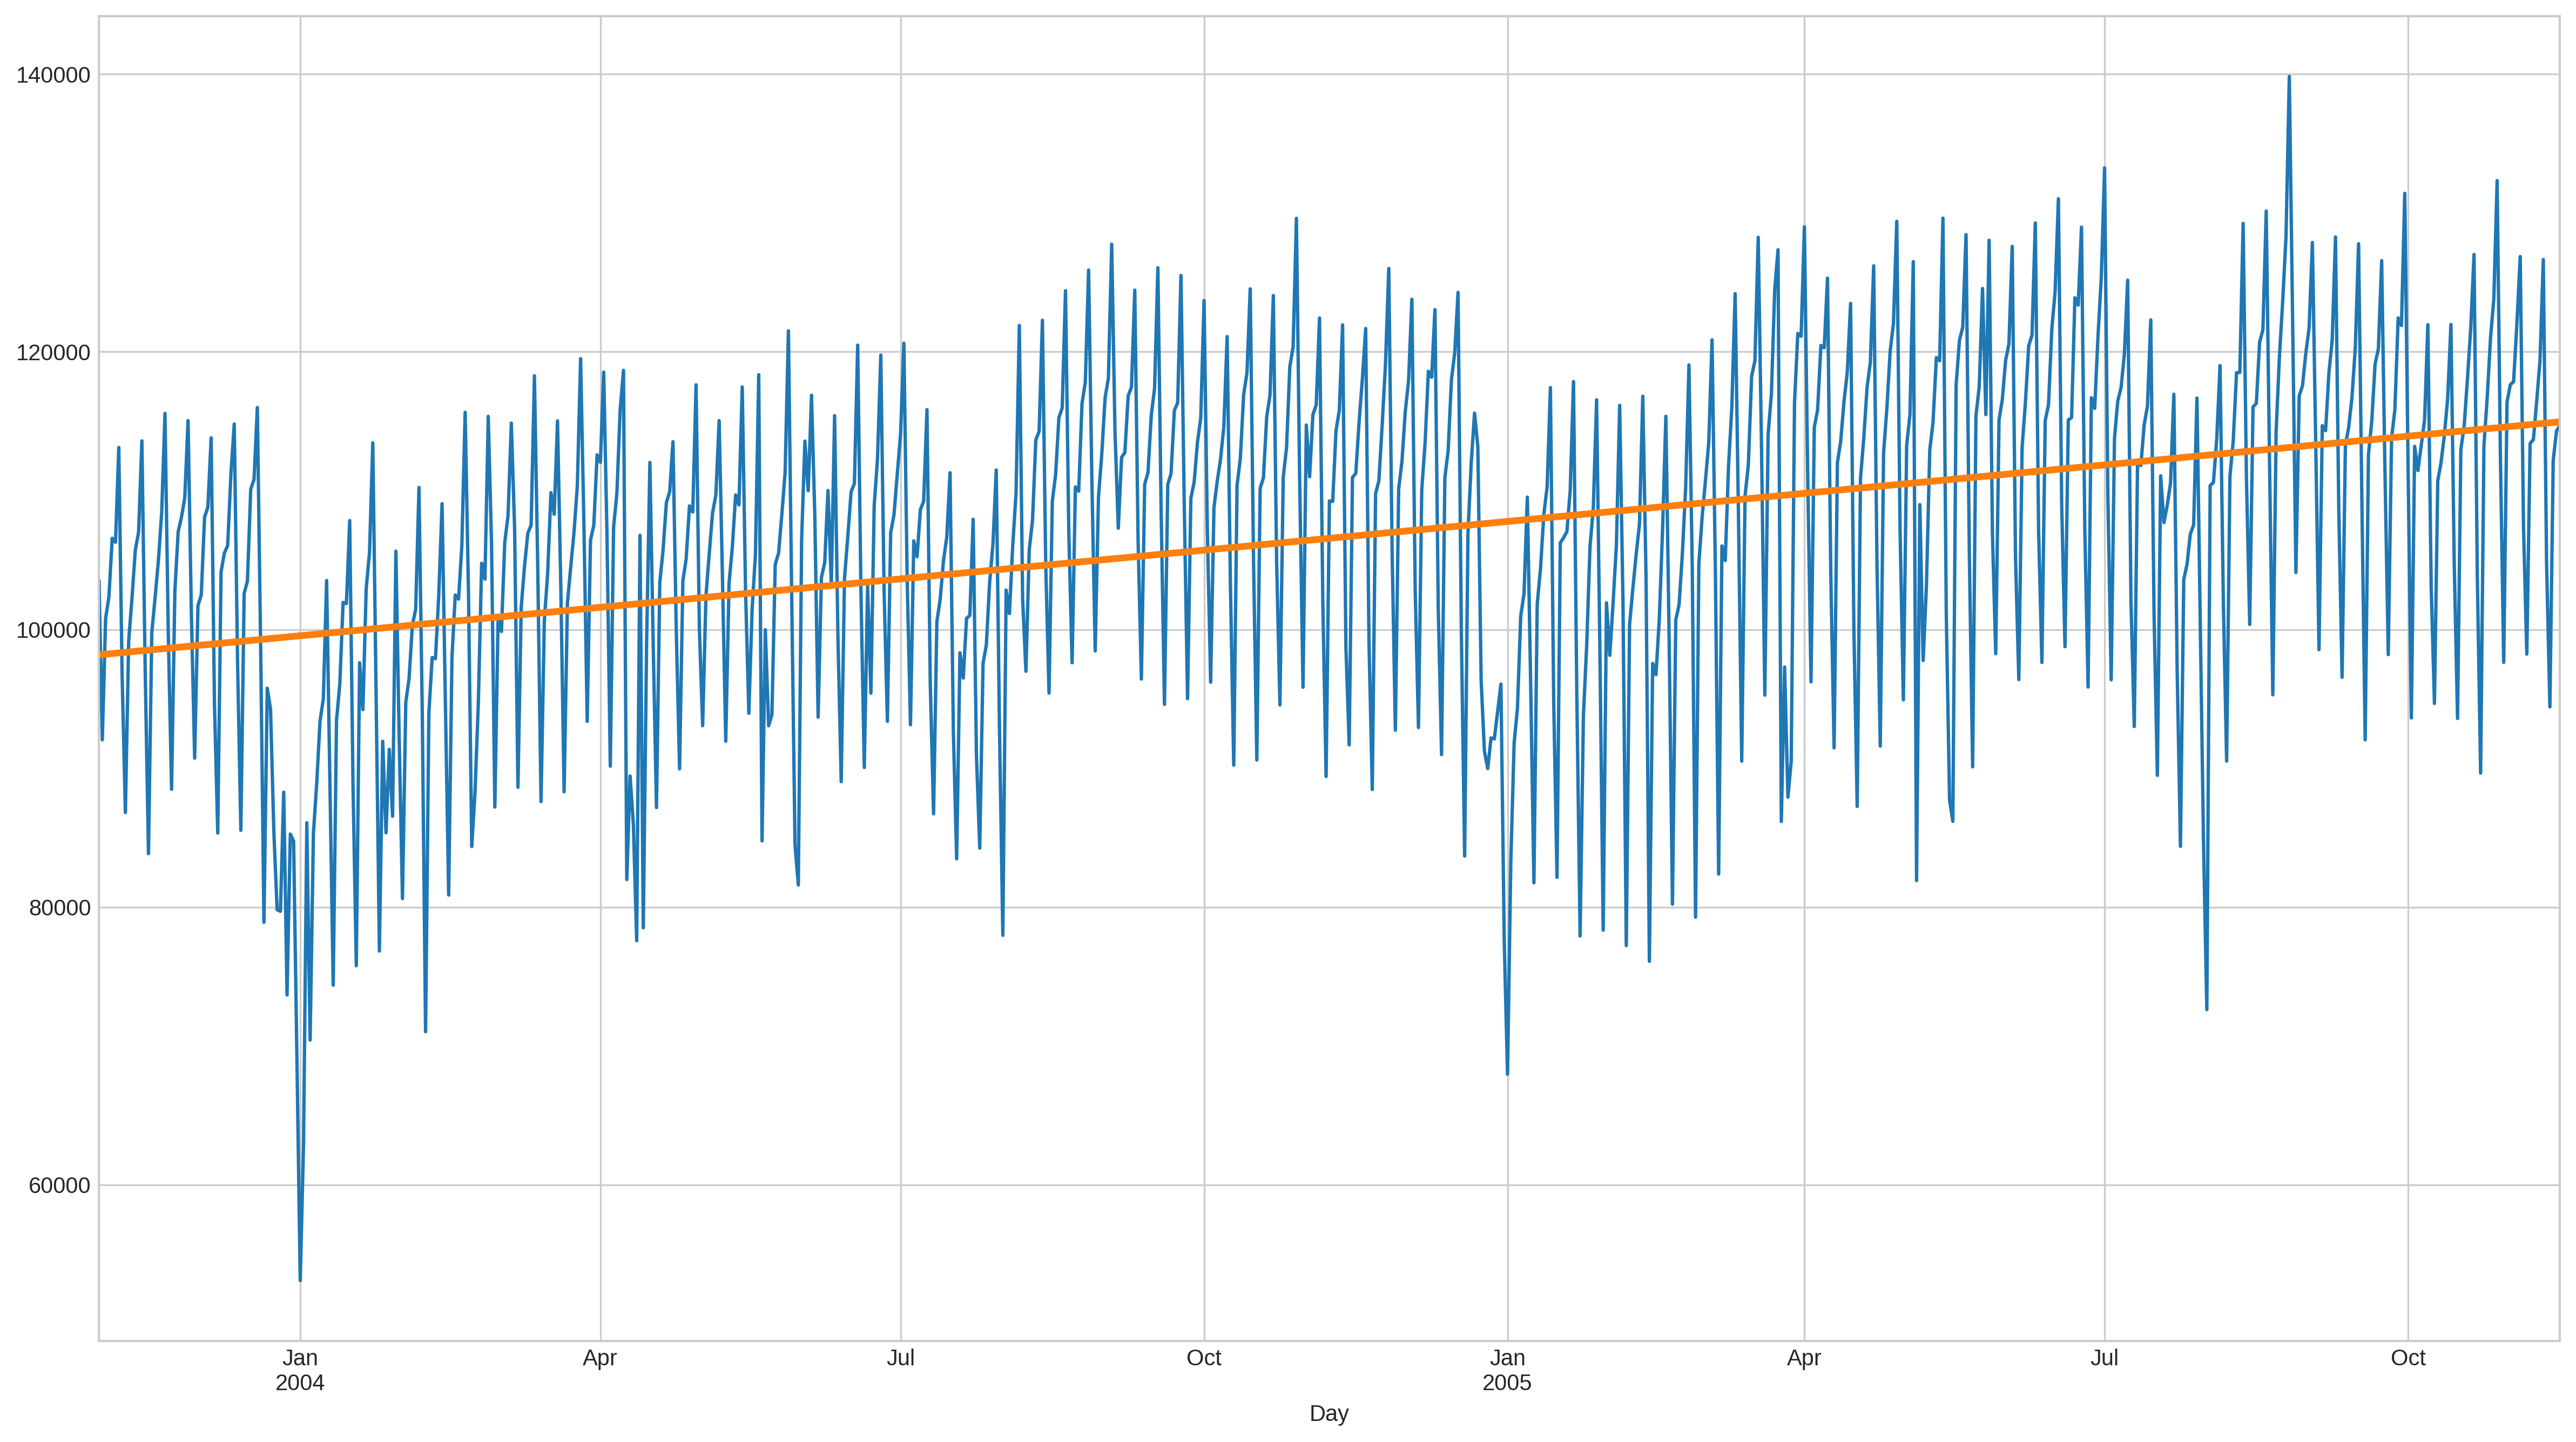

In [15]:
ax = y.plot()
ax = y_pred.plot(ax = ax, linewidth = 3)

In [16]:
df['lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [18]:
X = df.loc[:, ['lag_1']]
X.dropna(inplace = True)
y = df.loc[:, 'NumVehicles']

y, X = y.align(X, join = 'inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

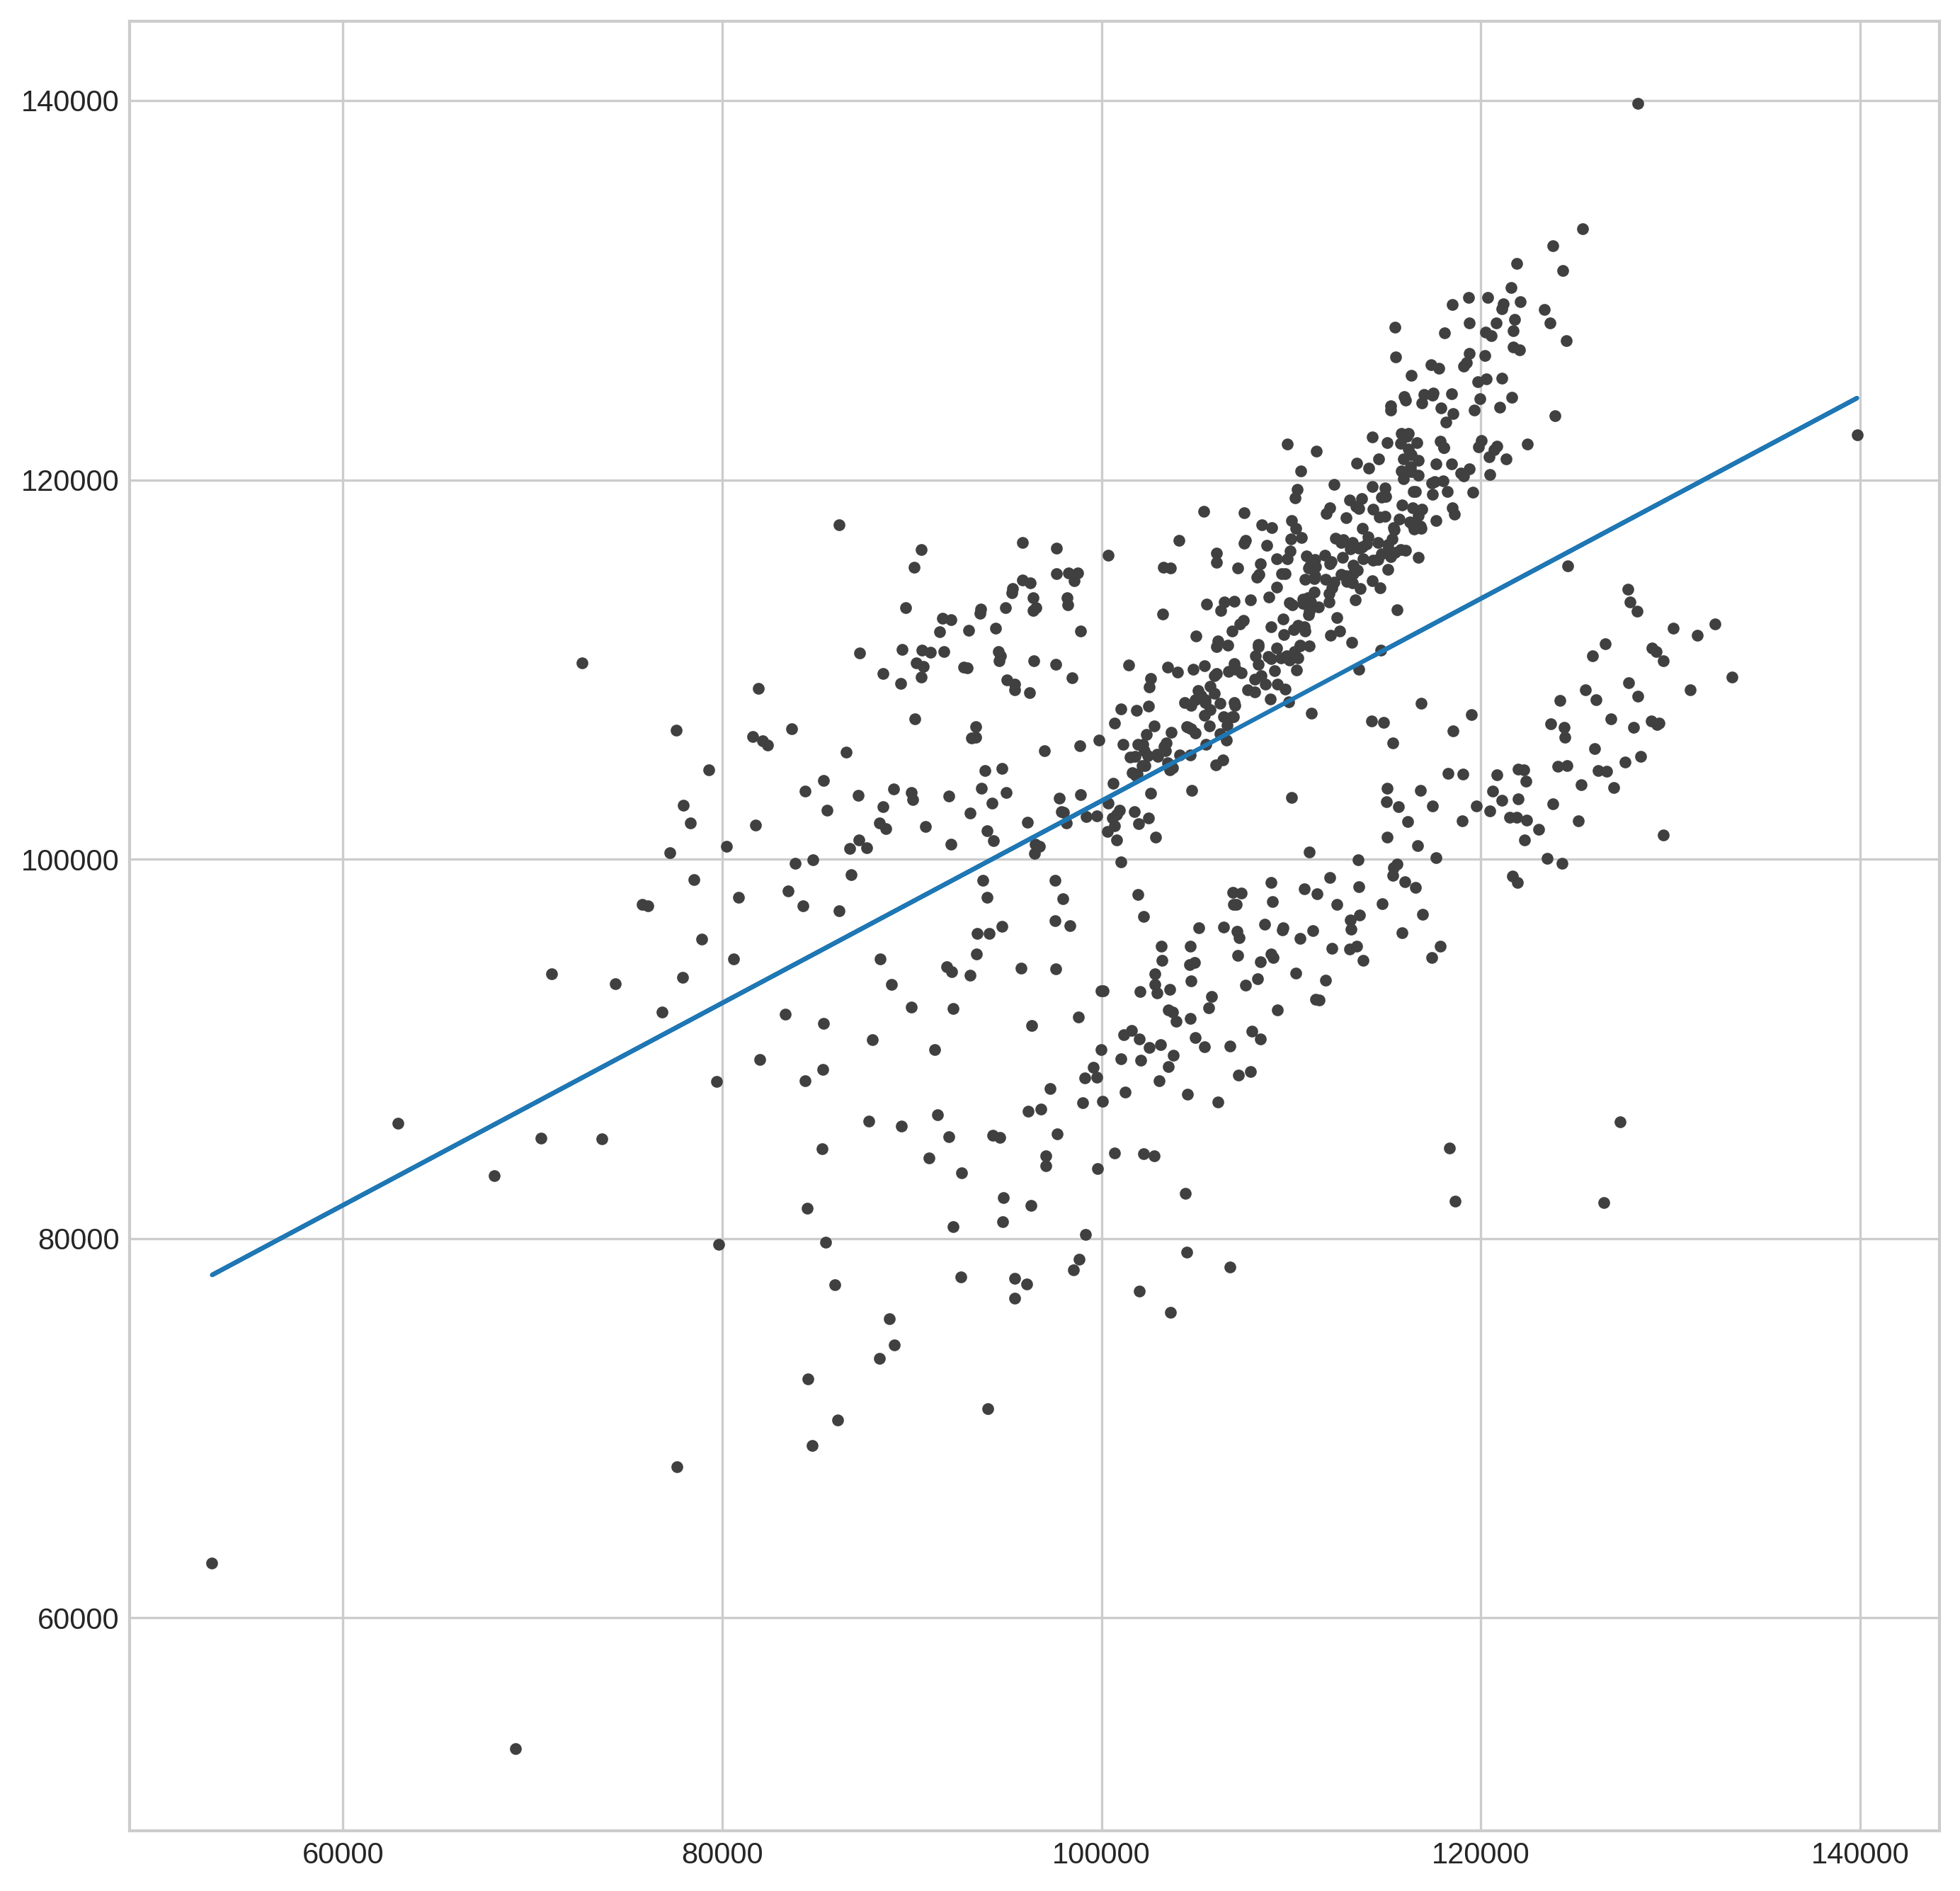

In [22]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color = '0.25')
ax.plot(X['lag_1'], y_pred)
ax.set_aspect('equal')

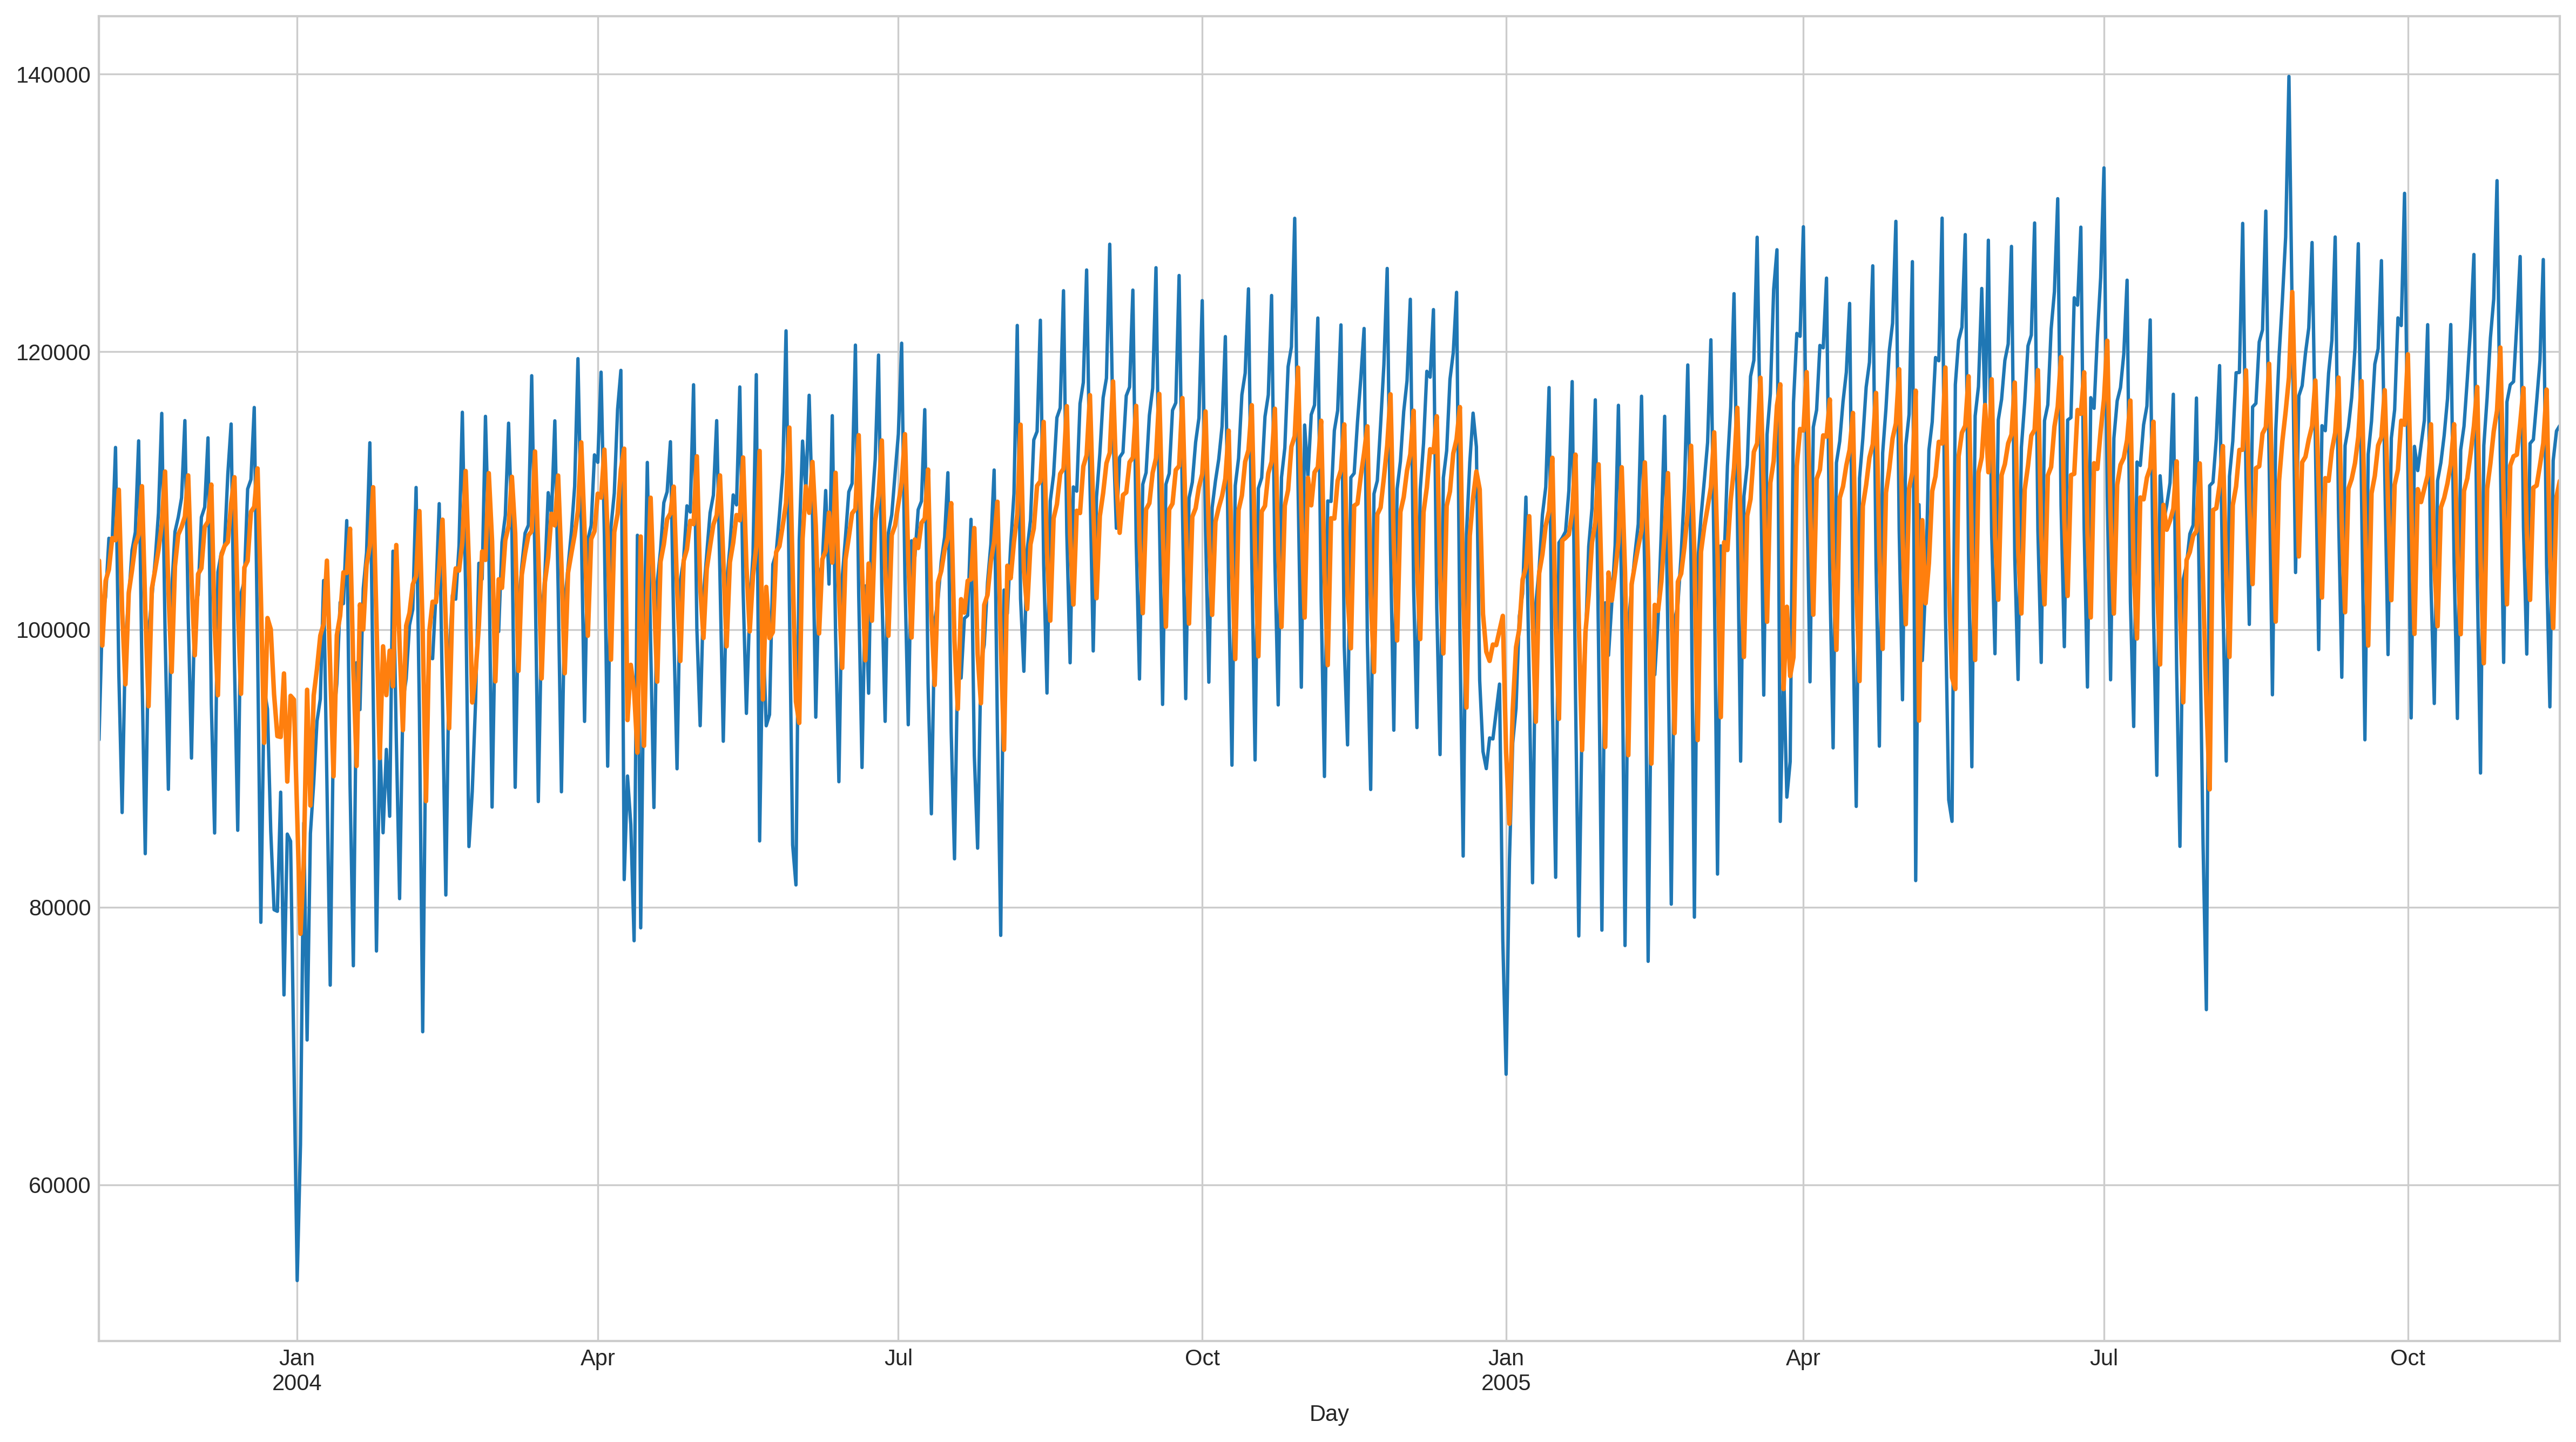

In [25]:
ax = y.plot()
ax = y_pred.plot(linewidth = 2)